In [1]:
from simulation import *
from aesthetics import *
from models import *
from data import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

In [97]:
def get_flux(name):
    this = simulation(data_source = 'adk_md_data')
    this.name = name
    
    
    this.C_intersurface = 10**6
    this.cSubstrate = 2*10**-6
    
    
    this.load = False
    this.simulate(plot=False)
    return np.mean(this.flux_u + this.flux_b), np.std(this.flux_u + this.flux_b)

In [98]:
def get_power(name, flux):
    if flux > 0:
        # If the flux is positive, that means there is probability flow towards 2 * pi.
        # This means we need to have a positive load, which will increase the energy surface at 2 * pi,
        # to reduce the amount of flux.
        guess = np.random.uniform(low = 0.000001, high = 0.001)
    else:
        guess = np.random.uniform(high = -0.000001, low = -0.001)
    
    results = sc.optimize.fmin(power_from_load, x0=guess, args=(name,), 
                                 full_output=True, disp=False)
    max_load = results[0][0]
    max_power = -1 * results[1]

    return max_power, max_load

def power_from_load(load, name):
    this = simulation(data_source = 'adk_md_data')
    this.name = name
    this.load = True
    this.load_slope = load
    
    
    this.C_intersurface = 10**6
    this.cSubstrate = 2*10**-6

    
    
    this.simulate()
    flux = np.mean(this.flux_u + this.flux_b)
    power = flux * load
    # Then, flip the curve upside down, so it can be minimized
    del this
    return -1 * power


C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.00e-06  M         
dt                        +1.00e-12  second**-1
-----------------         ---------  --------- 
Intrasurface flux         +4.35e-02  cycle second**-1
Intersurface flux         +8.65e-03  cycle second**-1


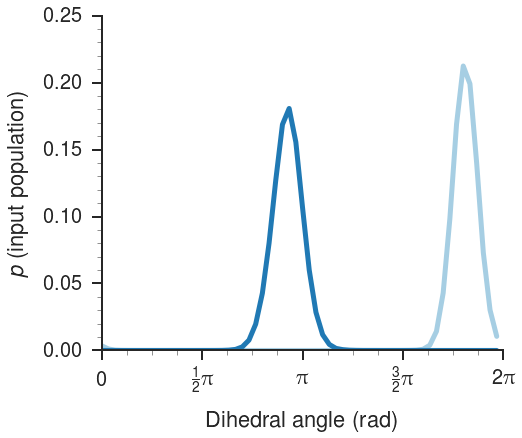

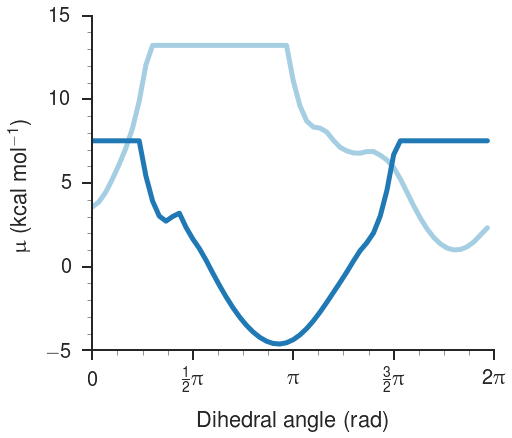

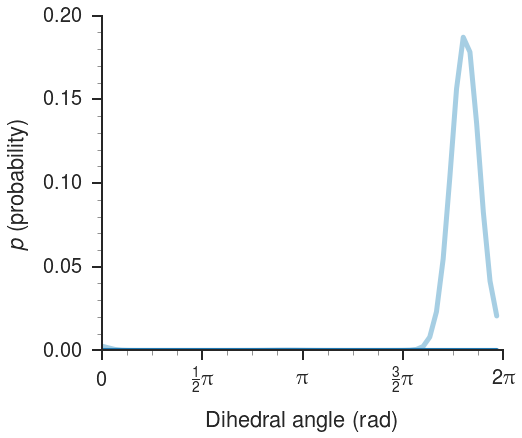

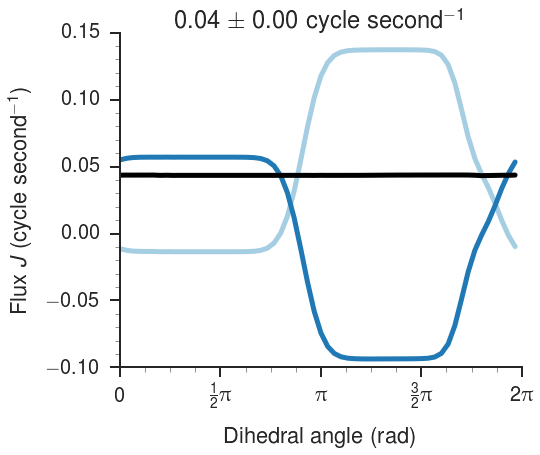

In [93]:
this = simulation(data_source='adk_md_data')
this.name = 'psiSER41'
this.cSubstrate = 2 * 10 **-6
this.simulate(plot=True)

In [100]:
flux, flux_std = get_flux('psiSER41')
max_power, max_load = get_power('psiSER41', flux)
print(max_power, max_load)

2.08003563917e-05 0.000488384190336


In [94]:
this = simulation(data_source='adk_md_data')
this.name = 'psiSER41'
this.C_intersurface = 10 ** 6
this.cSubstrate = 2 * 10**-6

powers = []
fluxes = []
loads = []

for load_slope in np.arange(-1, 2, 0.01):
    this.load = True
    this.load_slope = load_slope
    this.simulate()
    fluxes.append(np.mean(this.flux_u + this.flux_b))
    powers.append(load_slope * np.mean(this.flux_u + this.flux_b))
    loads.append(load_slope)

/mnt/639f049e-1c5c-4215-bb93-e396da93aa2b/projects/nonequilibrium/code/SG-model-v2/simulation.py:297: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


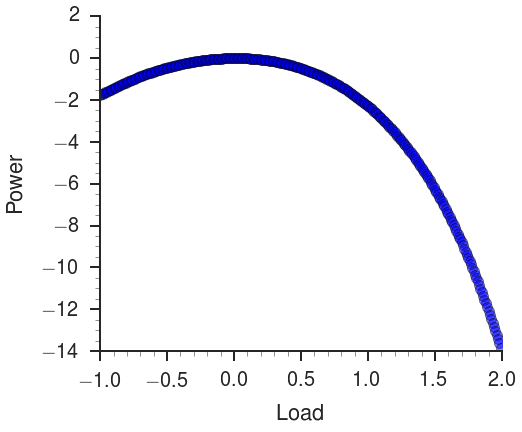

In [95]:
ax = aesthetics.generic_plot(loads, powers, 'Load', 'Power', scientific=True)

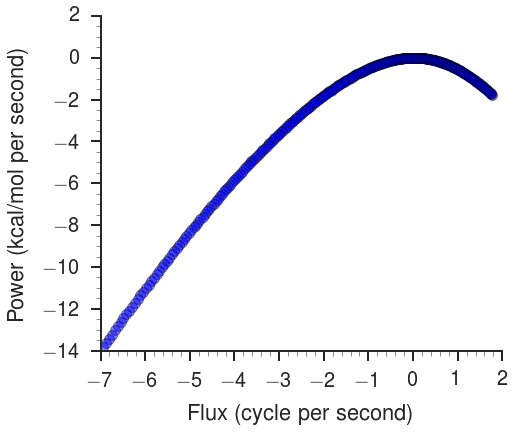

In [96]:
ax = aesthetics.generic_plot(fluxes, powers, 'Flux (cycle per second)', 'Power (kcal/mol per second)', scientific=False)